In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, time 
from numpy . random import default_rng

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("bm.csv", header = None)
print(data)

            0        1  2
0     6.75930  2.99840  0
1    -2.62890  3.97460  0
2     0.88878 -1.43350  1
3    -2.03500 -3.74210  0
4    -7.43160  0.86322  0
...       ...      ... ..
9995  5.01880 -0.28495  1
9996  7.23240 -0.24904  0
9997 -2.03320 -0.44094  1
9998 -4.49600 -1.99200  1
9999  2.50910  1.92650  0

[10000 rows x 3 columns]


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.columns = ['x','y','label']

Start by splitting the data into a training
and test set of 5000 examples each at random.

In [ ]:
#x = data.drop('label', axis=1)
#y = data['label']
train, test = train_test_split(data, test_size = 0.5)
train = train.reset_index().drop('index', axis=1)
test = test.reset_index().drop('index', axis=1)

In [ ]:

rng = np.random.default_rng ()
n = 5000
r = np.zeros ([n ,100] , dtype = int )
XX = np.zeros ([n ,3 ,100])

for i in range (100) :
    r [: , i] = rng.choice (n , size = n , replace = True )
    XX [: ,: , i] = train.iloc[r [: , i]]


we will
create our own simplified version of a random forest

In [ ]:
pred_train = np . zeros ([n ,100] , dtype = int )
pred_test = np . zeros ([n ,100] , dtype = int )
classifiers = []
for i in range(100):
    clf = RandomForestClassifier()
    clf.fit(XX [: ,:2 , i], XX [: ,2 , i])
    classifiers.append(clf)
    pred_train[:,i] = clf.predict(train[['x','y']]) 
    pred_test[:,i] = clf.predict(test[['x','y']])
    if(i%10 == 0):
        print("Done with ",str(i)," decision trees")

Done with  0  decision trees
Done with  10  decision trees
Done with  20  decision trees
Done with  30  decision trees
Done with  40  decision trees
Done with  50  decision trees
Done with  60  decision trees
Done with  70  decision trees
Done with  80  decision trees
Done with  90  decision trees


In [ ]:
ensemblem_pred_train = np.zeros ([n] , dtype = int )
ensemblem_pred_test = np.zeros ([n] , dtype = int )
for i in range(n):
    if((list(pred_test[i,:]).count(1)) >= (list(pred_test[i,:]).count(0))):
        ensemblem_pred_test[i] = 1
    if(list(pred_test[i,:]).count(0) > list(pred_test[i,:]).count(1)):
        ensemblem_pred_test[i] = 0

    if(list(pred_train[i,:]).count(1) >= list(pred_train[i,:]).count(0)):
        ensemblem_pred_train[i] = 1
    if(list(pred_train[i,:]).count(0) > list(pred_train[i,:]).count(1)):
        ensemblem_pred_train[i] = 0 

a) The estimate of the generalization error using the test set of the ensemble of 100 decision trees.
b) The average estimated generalization error of the individual decision trees.

In [ ]:
ensem_acc_train = accuracy_score(train['label'],ensemblem_pred_train)
ensem_acc_test = accuracy_score(test['label'],ensemblem_pred_test)
avg_gen_Trainerror = 0
for i in range(100):
    acc = accuracy_score(XX [: ,2 , i],pred_train[:,i])
    avg_gen_Trainerror = avg_gen_Trainerror + (ensem_acc_train - acc)

print("Training accuracy for ensemble of 100 decision trees : " ,ensem_acc_train *100 )
print("Test accuracy for ensemble of 100 decision trees : ", ensem_acc_test*100)
print("Difference between train and test accuracy : ", (ensem_acc_train - ensem_acc_test)*100)
print("Average estimated generalization error of the individual decision trees : ", avg_gen_Trainerror)


Training accuracy for ensemble of 100 decision trees :  100.0
Test accuracy for ensemble of 100 decision trees :  97.76
Difference between train and test accuracy :  2.2399999999999975
Average estimated generalization error of the individual decision trees :  47.17380000000001


c) A plot of the decision boundaries of all the models , and including the ensemble model

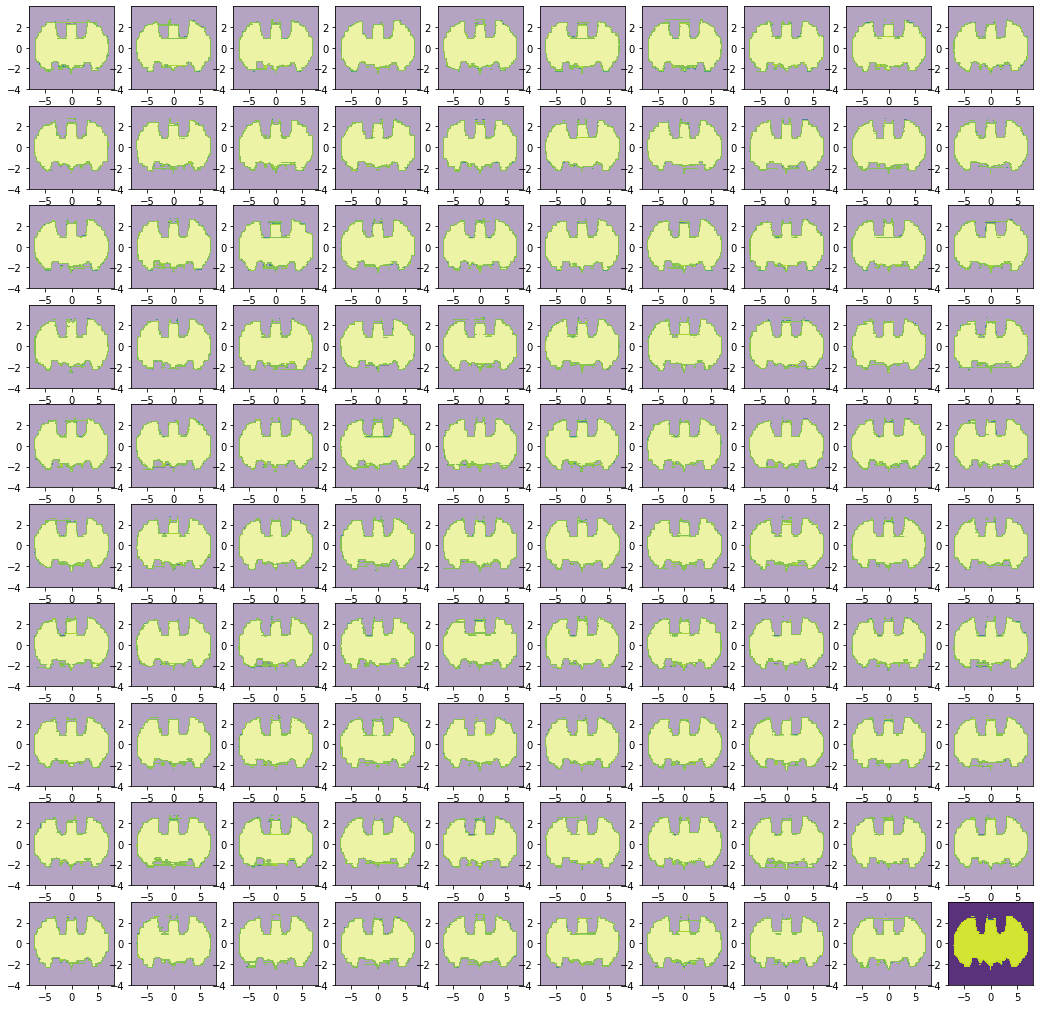

In [ ]:
xx, yy = np.meshgrid(np.arange(-8, 8, 0.01), np.arange(-4, 4, 0.01))
points = np.c_[xx.ravel(), yy.ravel()]
pred_points = []
plt.figure(figsize=(18,18))
for i in range(100):
    points_pred = classifiers[i].predict(points)
    pred_points.append(points_pred)

    if(i!=99):
        Z = np.array(points_pred).reshape(xx.shape)
        plt.subplot(10, 10, i+1)
        plt.contourf(xx, yy, Z,alpha=0.4)

pred_points = np.array(pred_points)
ensemblem_point_pred = []
for i in range(pred_points.shape[1]):
    if((list(pred_points[:,i]).count(1)) >= (list(pred_points[:,i]).count(0))):
        ensemblem_point_pred.append(1)
    if(list(pred_points[:,i]).count(0) > list(pred_points[:,i]).count(1)):
        ensemblem_point_pred.append(0)

Z = np.array(ensemblem_point_pred).reshape(xx.shape)
plt.subplot(10, 10, 100)
plt.contourf(xx, yy, Z,alpha=0.9)
plt.show()

d) Finally, a short comment on the results. Was it expected? Surprising? Do you see any benefits,
downsides with this method?


yes it was expected and surprising,as we can see the decision boundaries have been plotted,difference between the plots were shown clearly as we have taken only 100 samples.